C:\Users\cahya\AppData\Local\Temp\ipykernel_2212\2980259513.py:88: RuntimeWarning: divide by zero encountered in scalar divide
  x_next = x_prev - (func(x_prev)/diff(func, x_prev))
C:\Users\cahya\AppData\Local\Temp\ipykernel_2212\2980259513.py:70: RuntimeWarning: invalid value encountered in scalar subtract
  return (func(x+h)-func(x-h))/(2*h)


The solution for r:  [3.26045072e+08]
There are other values where grav(r) is close to zero, but they didn't reach 0, hence we only have one real solution


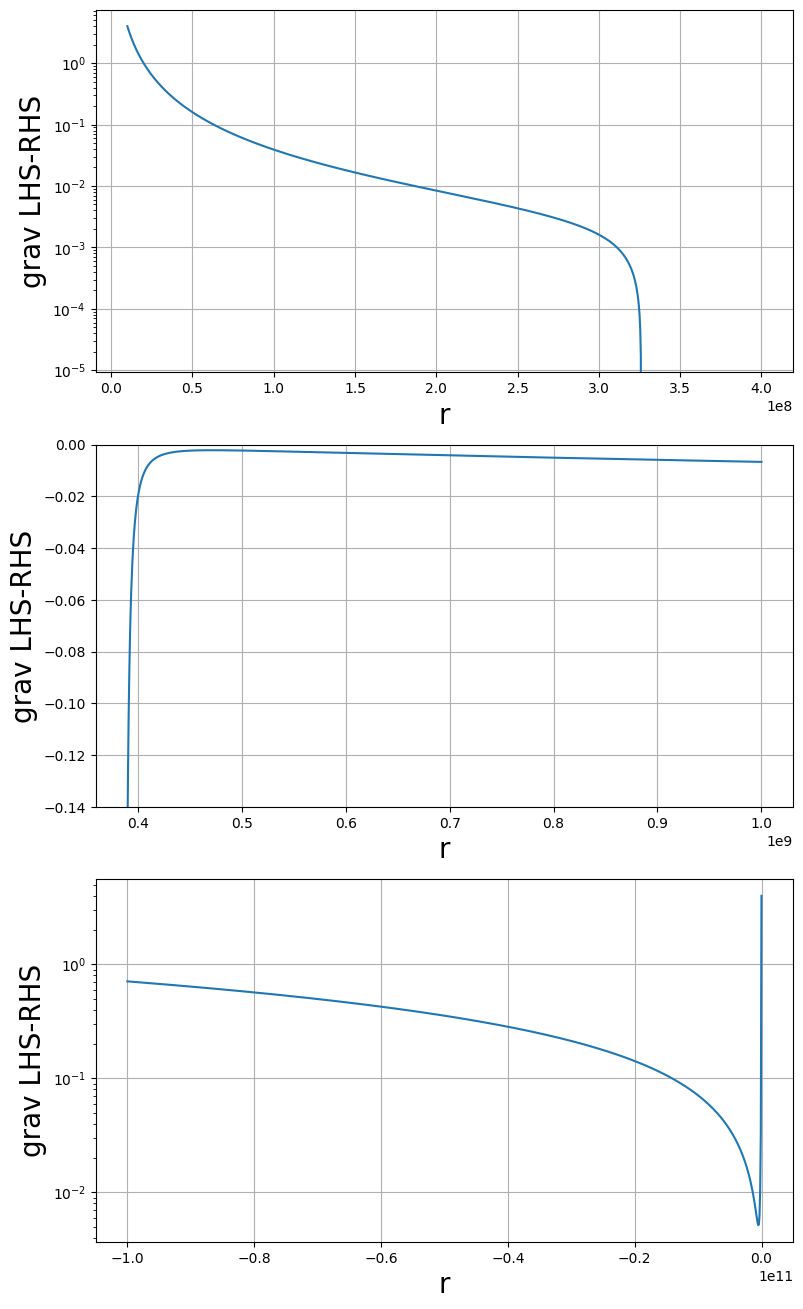

In [1]:
# Exercise 3.1
# Author: Felix Cahyadi
# Date: 02.10.2023

# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Create the function that gives the value of LHS - RHS
def grav(r, *args, G = 6.674e-11, M = 5.974e24, m = 7.348e22, R = 3.844e8, omega = 2.662e-6):
    """Function that calculates the gravity equation

    Args:
        r (float): Distance of the lagrange point from the earth
        G (float, optional): Gravitational constant. Defaults to 6.674e-11.
        M (float, optional): Mass of the Earth. Defaults to 5.974e24.
        m (float, optional): Mass of the Moon. Defaults to 7.348e22.
        R (float, optional): The distance between the Moon and the Earth. Defaults to 3.844e8.
        omega (float, optional): Angular velocity of the Moon around the Earth. Defaults to 2.662e-6.

    Returns:
        float: the LHS - RHS of the gravity equation
    """
    LHS = (G*M/(r**2)) - ((G*m)/((R-r)**2))
    RHS = (omega**2)*r
    return LHS-RHS

# Plot the value of the function
r_arr1 = np.linspace(1e7,4e8, 1000)
r_arr2 = np.linspace(3.9e8,1e9, 1000)
r_arr3 = np.linspace(-1e7,-1e11,1000)
grav_arr1 = grav(r_arr1)
grav_arr2 = grav(r_arr2)
grav_arr3 = grav(r_arr3)


fig, axs = plt.subplots(nrows=3, ncols=1,figsize = (9,16))
axs[0].plot(r_arr1,grav_arr1) # We can see a dip in value close to 3.2e8 m
axs[0].set_yscale('log') # Using the log scale, we can see the drop in value
axs[0].set_xlabel('r', fontsize = 20)
axs[0].set_ylabel('grav LHS-RHS', fontsize = 20)
axs[0].grid(True)

axs[1].plot(r_arr2, grav_arr2)
#axs[1].set_yscale('log')
axs[1].set_ylim([-0.14,0])
axs[1].set_xlabel('r', fontsize = 20)
axs[1].set_ylabel('grav LHS-RHS', fontsize = 20)
axs[1].grid(True)

axs[2].plot(r_arr3, grav_arr3)
axs[2].set_yscale('log')
#axs[2].set_ylim([-0.02,0])
axs[2].set_xlabel('r', fontsize = 20)
axs[2].set_ylabel('grav LHS-RHS', fontsize = 20)
axs[2].grid(True)

# Define function to calculate the derivative of a function
def diff(func, x, h = 1e-5):
    """Function to differentiate a mathematical function

    Args:
        func (function): The function that we want to evaluate
        x (float): The position where we want to evaluate the derivative
        h (float, optional): The step size. Defaults to 1e-5.

    Returns:
        float: The derivative of the function at point x
    """
    return (func(x+h)-func(x-h))/(2*h)

# Define function for Newton-Raphson method
def NewRaph(func, x_0, tol = 1e-8, max_iter = 100):
    """ This is a function to apply the Newton-Raphson method.

    Args:
        func (function): Function that we want to evaluate
        x_0 (float): Initial guess
        tol (float, optional): The tolerance that we want to use for zero-finding. Defaults to 1e-8.
        max_iter (int, optional): Maximum number of iteration, so that it doesn't stuck in an infinite loop. Defaults to 100.

    Returns:
        float: The roots
    """
    x_prev = x_0
    count = 0
    while np.abs(x_prev)>tol and count<=max_iter:
        x_next = x_prev - (func(x_prev)/diff(func, x_prev))
        x_prev = x_next
        count += 1

    if count == max_iter:
        print('Reached the maximum number of iteration')

    return x_next

# Define function to find the solution between the range (xa,xb) and N partition
def find_roots(func, x_min, x_max, N = 1000):
    """Finding roots the brute force way using Newton-Raphson method

    Args:
        func (function): The function that we want to examine
        x_min (float): The lower limit of the search space
        x_max (float): The upper limit of the search space
        N (int): The number of partition of the search space, default: 1000

    Returns:
        NDarray: NumPy array containing the roots of the calculations
    """

    search_arr = np.linspace(x_min,x_max,N) # create the search space

    roots = np.array([],dtype=np.float64) # Create an empty array to contain the roots

    for s in search_arr: # Iterate through the search space
        root = NewRaph(func,s) # Calculate the root
        if not (root in roots): # If the root is new, append it to roots
            if not np.isnan(root):
                roots = np.append(roots, root)
            

    return roots

# Use the defined function to solve 
grav_roots = find_roots(grav, -1e10,1e10, 10000)
print("The solution for r: ", grav_roots)
print("There are other values where grav(r) is close to zero, but they didn't reach 0, hence we only have one real solution")





From the plot, we acquired the values where the two equations are close to zero, and the two equations coincides near (0,1) and (2,2), this means we might have solutions there
We are going to use (0,1) and (2,2) to guess the solution
[0.27942308 1.01961538]
[1.72057692 1.98038462]


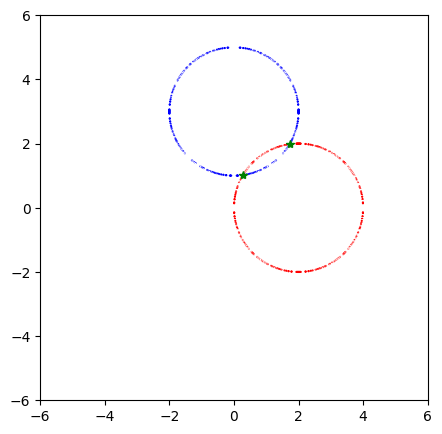

In [36]:
# Exercise 3.2
# Author: Felix Cahyadi
# Date: 02.10.2023

# Import libraries
import numpy as np
from gnewton import gnewton

# Firstly, we are going to create the function that calculates the value of the LHS - RHS

def nonlin(x, ret_np = True):
    """function that calculates the value of the LHS - RHS of the nonlinear function

    Args:
        x (NDarray): matrix containing the x coordinates
        y (NDarray): matrix containing the y coordinates

    Returns:
        NDarray: the value of the 1st equation
        NDarray: the value of the 2nd equation
    """
    sol = []

    sol.append(((x[0] - 2)**2) + (x[1]**2) - 4)
    sol.append((x[0]**2) + ((x[1] - 3)**2) - 4)

    if ret_np:
        return np.array(sol)
    else:
        return sol

# We can then do some contour plot to identify some roots
x_arr = np.linspace(-6,6,1000)
y_arr = np.linspace(-6,6,1000)

X,Y = np.meshgrid(x_arr,y_arr)
Z1,Z2 = nonlin([X,Y], ret_np=False) # The value of the first and the second equation on different coordinates

fig, ax = plt.subplots(figsize = (5,5))
ax.contour(X,Y,np.abs(Z1),levels = [0.005],colors = ['r']) # We plot the absolute value so that we can detect values near zero without caring for the sign
ax.contour(X,Y,np.abs(Z2),levels = [0.005],colors = ['b'])

print("From the plot, we acquired the values where the two equations are close to zero, and the two equations coincides near (0,1) and (2,2), this means we might have solutions there")
print("We are going to use (0,1) and (2,2) to guess the solution")

# Find the solutions using gnewton.py
guess1 = np.array([0,1])
guess2 = np.array([2,2])
sol1 = gnewton(nonlin, guess1)
sol2 = gnewton(nonlin, guess2)

ax.plot(sol1[0],sol1[1], 'g*')
ax.plot(sol2[0],sol2[1], 'g*')

print("The coordinates of the first solution: ", sol1)
print("The coordinates of the second solution: ", sol2)



In [ ]:
# Exercise 3.3
# Author: Felix Cahyadi
# Date: 02.10.2023

# Import libraries
import numpy as np
